### K mean clustering 

In [1]:
## Import all the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../data/PreProcessed/MixWine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Let's perform K-means clustering with 9 clusters, considering the 9 types of wine quality using all the features in the dataset.

In [3]:
X = df.select_dtypes(include='number')
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### K mean clustering using 9 Clusters and Let's see how cluster look like

In [4]:
kmeans = KMeans(n_clusters=9, random_state=0, n_init=10000)
kmeans

KMeans(n_clusters=9, n_init=10000, random_state=0)

In [5]:
y_predict = kmeans.fit_predict(X_scaled)
y_predict

array([2, 2, 2, ..., 1, 0, 4], dtype=int32)

### Get the Centroids of the cluster

In [6]:
centroids = kmeans.cluster_centers_
centroids

array([[0.22137629, 0.15814485, 0.18983941, 0.04816185, 0.04520088,
        0.10100769, 0.23427353, 0.07231744, 0.41949115, 0.16307839,
        0.64441191, 0.65311309],
       [0.26617773, 0.11394776, 0.21081013, 0.15577811, 0.07256533,
        0.15126395, 0.36646372, 0.18707886, 0.31284118, 0.15222487,
        0.21059283, 0.53053716],
       [0.33890447, 0.35328373, 0.11926277, 0.03016018, 0.13011687,
        0.0557054 , 0.12698527, 0.18956417, 0.44707457, 0.20442917,
        0.233081  , 0.35243056],
       [0.25559215, 0.15644662, 0.2200489 , 0.15350267, 0.07907424,
        0.15990262, 0.40045829, 0.19126326, 0.34073463, 0.15676767,
        0.19082421, 0.32049715],
       [0.27718066, 0.11347841, 0.21273488, 0.0585977 , 0.05004045,
        0.10330131, 0.25545713, 0.09674945, 0.29608387, 0.14284217,
        0.49136192, 0.5343696 ],
       [0.27684221, 0.14154812, 0.18897347, 0.04422504, 0.06588221,
        0.07430168, 0.2522222 , 0.12292667, 0.33166834, 0.1384044 ,
        0.32454335,

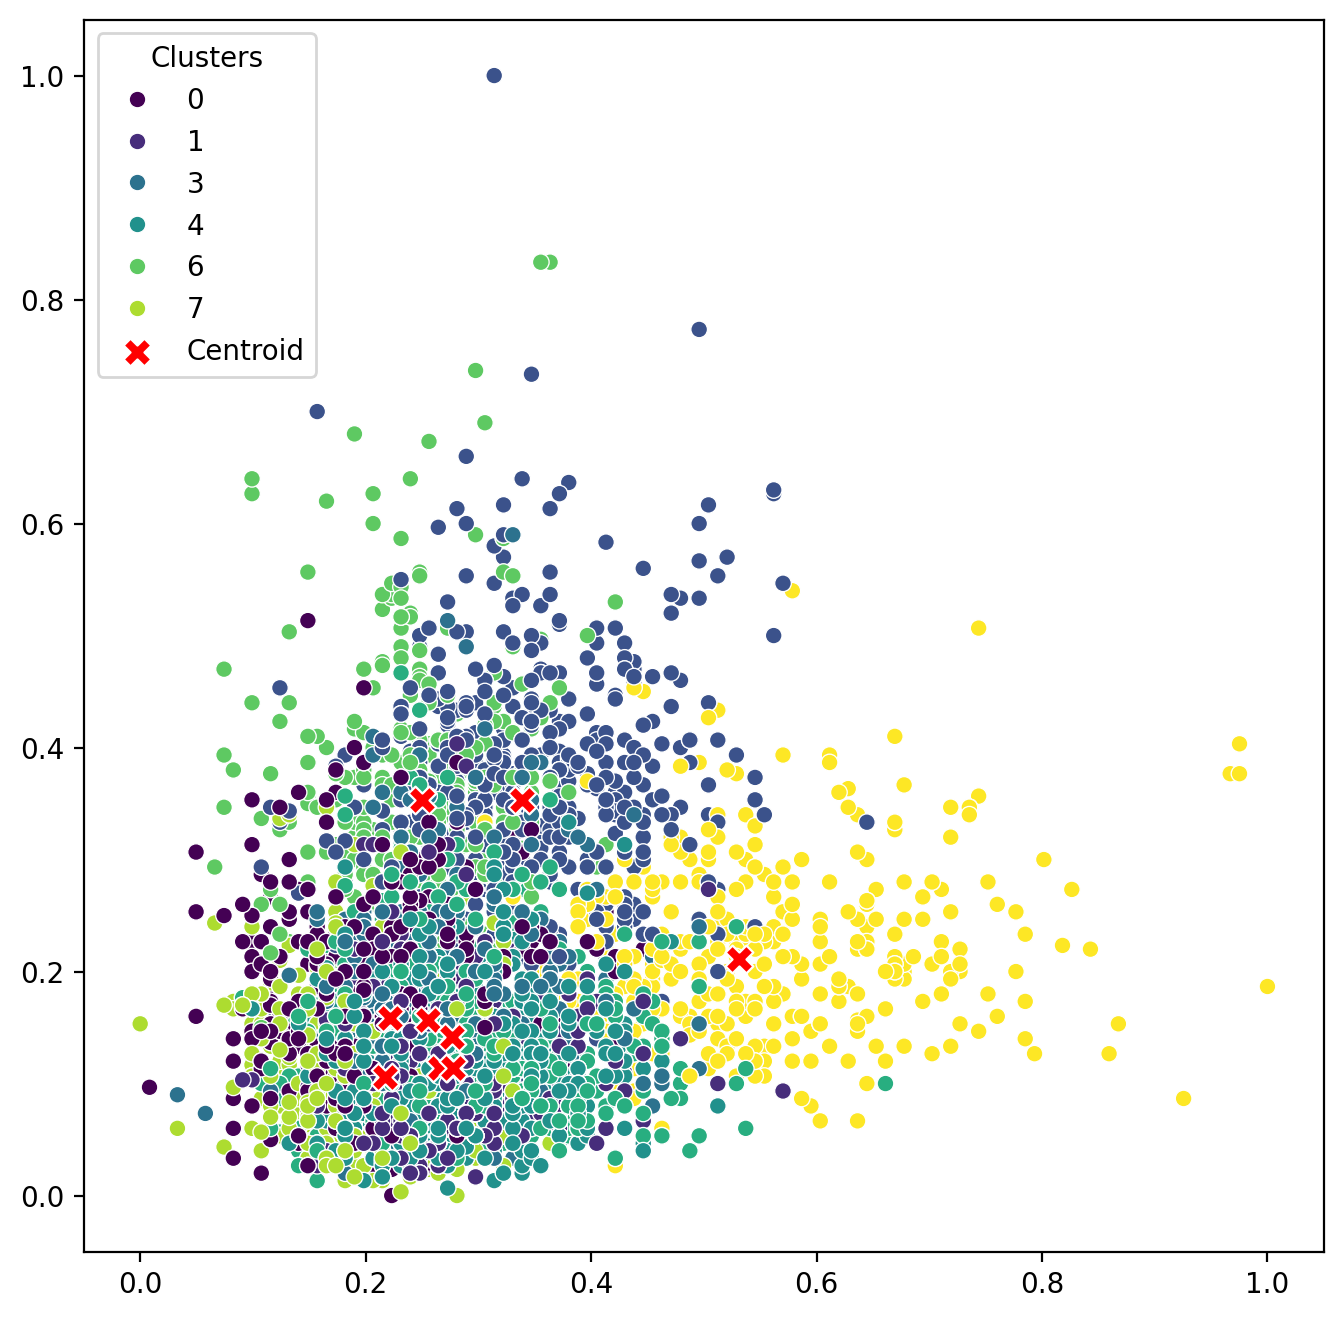

In [7]:
plt.figure(figsize=(8, 8), dpi=200)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_predict, palette='viridis')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='X', s=100, color='red', label='Centroid')

plt.legend(title='Clusters', loc='upper left')
plt.show()

##### As we can see, the dataset does not exhibit clear clustering across all features with 9 clusters. To determine the accurate number of clusters, we can explore alternative methods.

## *In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set*

#### For elbow method, we should plot sse(sum of squared errors) vs different k values and check the point where elbow is formed

In [8]:
sse = [] ## sum of squared errors
k_range = range(2,15)
score = []
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    score.append(silhouette_score(X_scaled, kmeans.labels_, metric='euclidean'))
score

[0.2082628093071219,
 0.2371760683007269,
 0.2453698617574863,
 0.17654534973491087,
 0.16736768299640117,
 0.1612908083124858,
 0.15192018014508576,
 0.15188509985416623,
 0.1425137888358245,
 0.13753662966270028,
 0.1375435286824064,
 0.1355593873901633,
 0.1406889518767995]

[Text(0.5, 0, 'no of clusters'),
 Text(0, 0.5, 'SSE(Sum of squared error)'),
 Text(0.5, 1.0, 'sse vs number of clusters')]

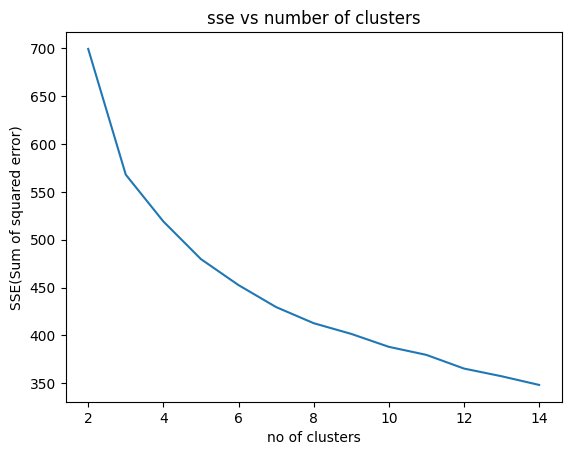

In [9]:
sseplot = sns.lineplot(x = k_range, y = sse)
sseplot.set(xlabel ="no of clusters", ylabel = "SSE(Sum of squared error)", title ="sse vs number of clusters")

#### Here The Elbow method may not provide a reliable suggestion for the appropriate value of k; therefore, We check the cluster number using the silhouette coefficient. 

In [10]:
for n_clusters in range(2, 10):  # Start from 2 clusters
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg}")

For n_clusters = 2, The average silhouette_score is: 0.22707432562097693
For n_clusters = 3, The average silhouette_score is: 0.23721874205909962
For n_clusters = 4, The average silhouette_score is: 0.2453471943744933
For n_clusters = 5, The average silhouette_score is: 0.1766014297930513
For n_clusters = 6, The average silhouette_score is: 0.17299776099219216
For n_clusters = 7, The average silhouette_score is: 0.17187238729123877
For n_clusters = 8, The average silhouette_score is: 0.1552113682528166
For n_clusters = 9, The average silhouette_score is: 0.15363326013269205


##### According to the silhouette score, the optimal number of clusters appears to be 4, as the average silhouette score is 0.24, which is the highest among the options. However, it's worth noting that a silhouette score of 0.24 might not be considered particularly high or indicative of strong cluster separation.

#### Now, Let's check Silhouette score visually 

For n_clusters = 2, The average silhouette_score is : 0.22707432562097693
For n_clusters = 3, The average silhouette_score is : 0.23721874205909962
For n_clusters = 4, The average silhouette_score is : 0.2453471943744933
For n_clusters = 5, The average silhouette_score is : 0.1766014297930513
For n_clusters = 6, The average silhouette_score is : 0.17299776099219216
For n_clusters = 7, The average silhouette_score is : 0.17187238729123877
For n_clusters = 8, The average silhouette_score is : 0.1552113682528166
For n_clusters = 9, The average silhouette_score is : 0.15363326013269205


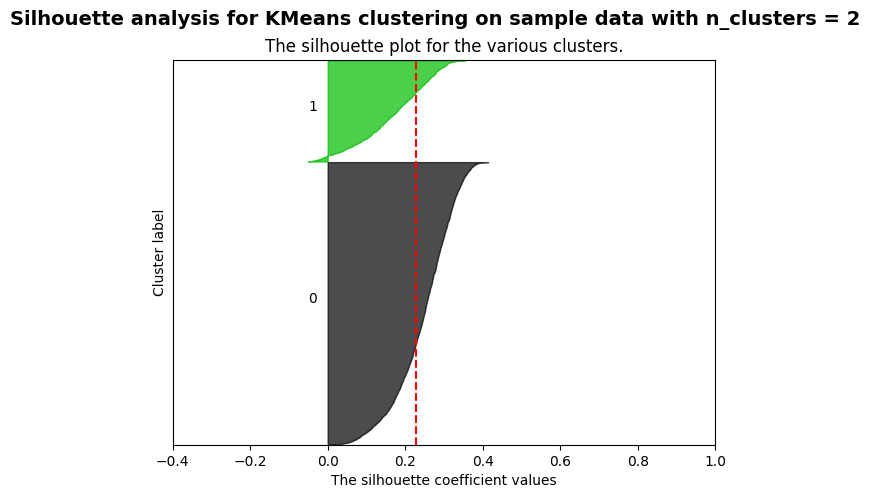

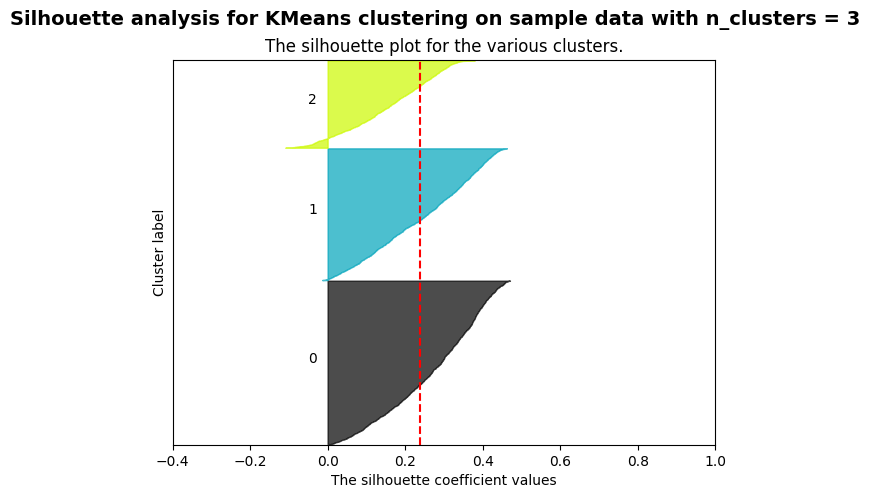

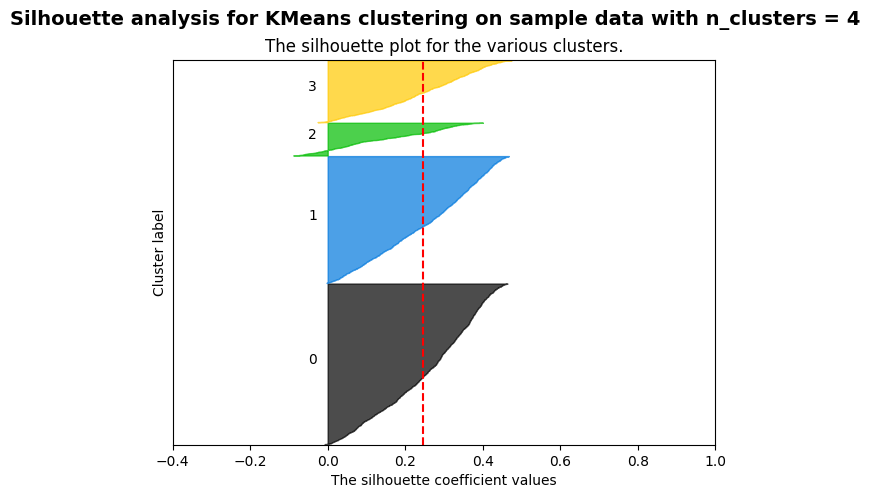

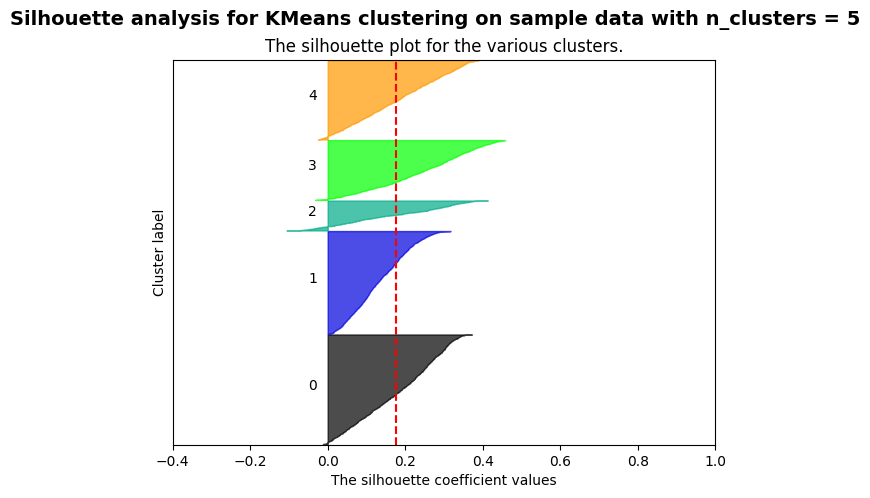

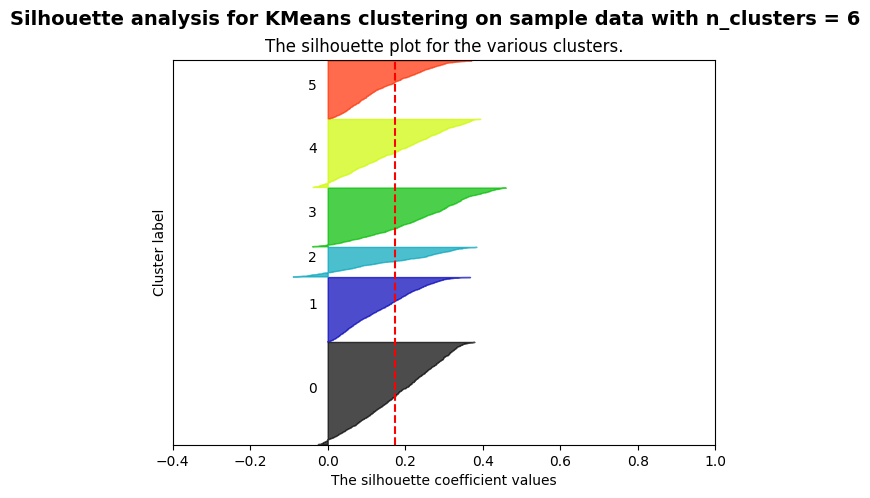

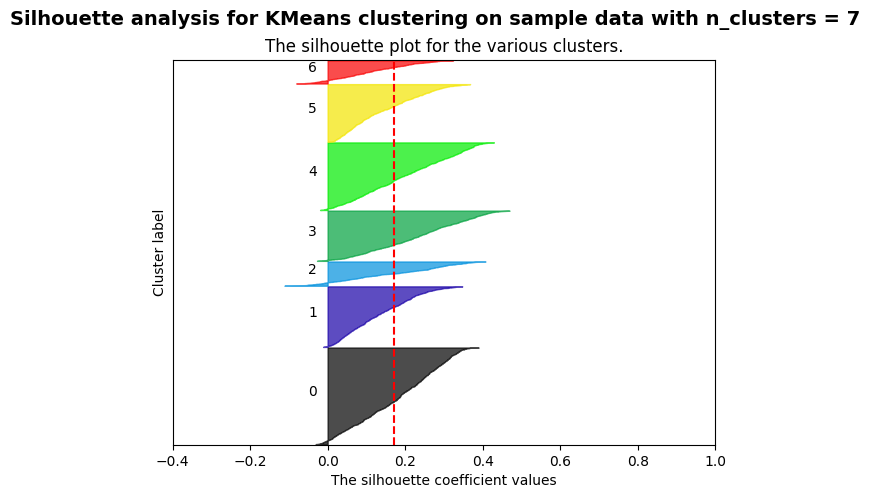

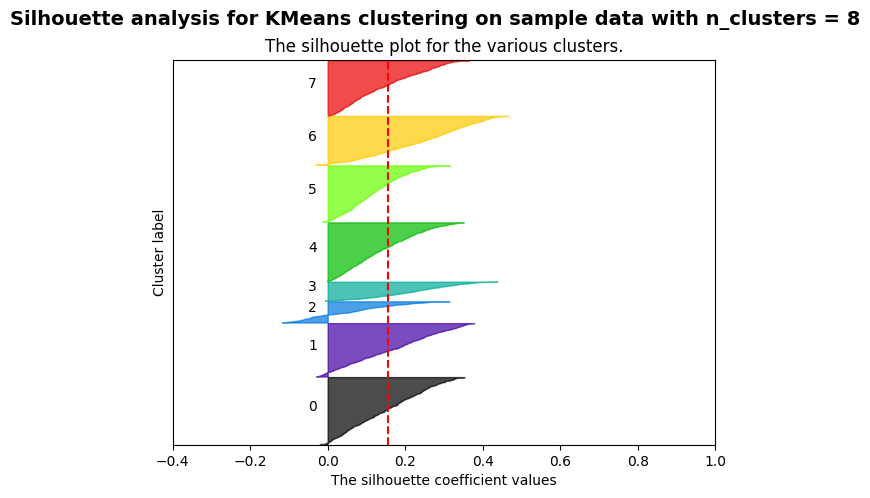

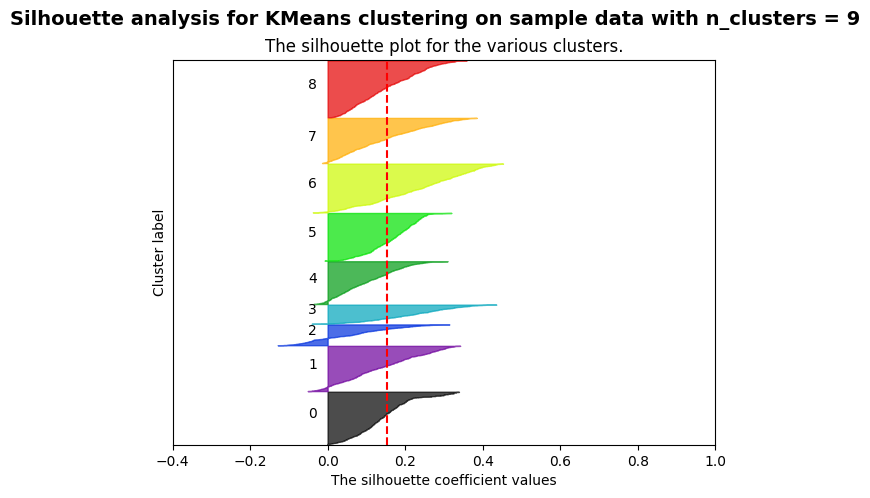

In [11]:
def visualize_silhouette(X_scaled, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot for the silhouette plot
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(7, 5)

        # The silhouette coefficient can range from -1 to 1, but in this example, all
        # lie within [-0.4, 1]
        ax1.set_xlim([-0.4, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X_scaled)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(
            f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}"
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for the next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for the average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the y-axis labels / ticks
        ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()
 
visualize_silhouette(X_scaled, range_n_clusters=range(2, 10))

##### According to the silhouette analysis for 4 clusters, the silhouette coefficient value should not be negative. However, in the graph, it is observed to be negative, indicating that a cluster count of 4 may not be suitable for all features of the dataset.

#### Let's take 4 cluster for all feature of dataset

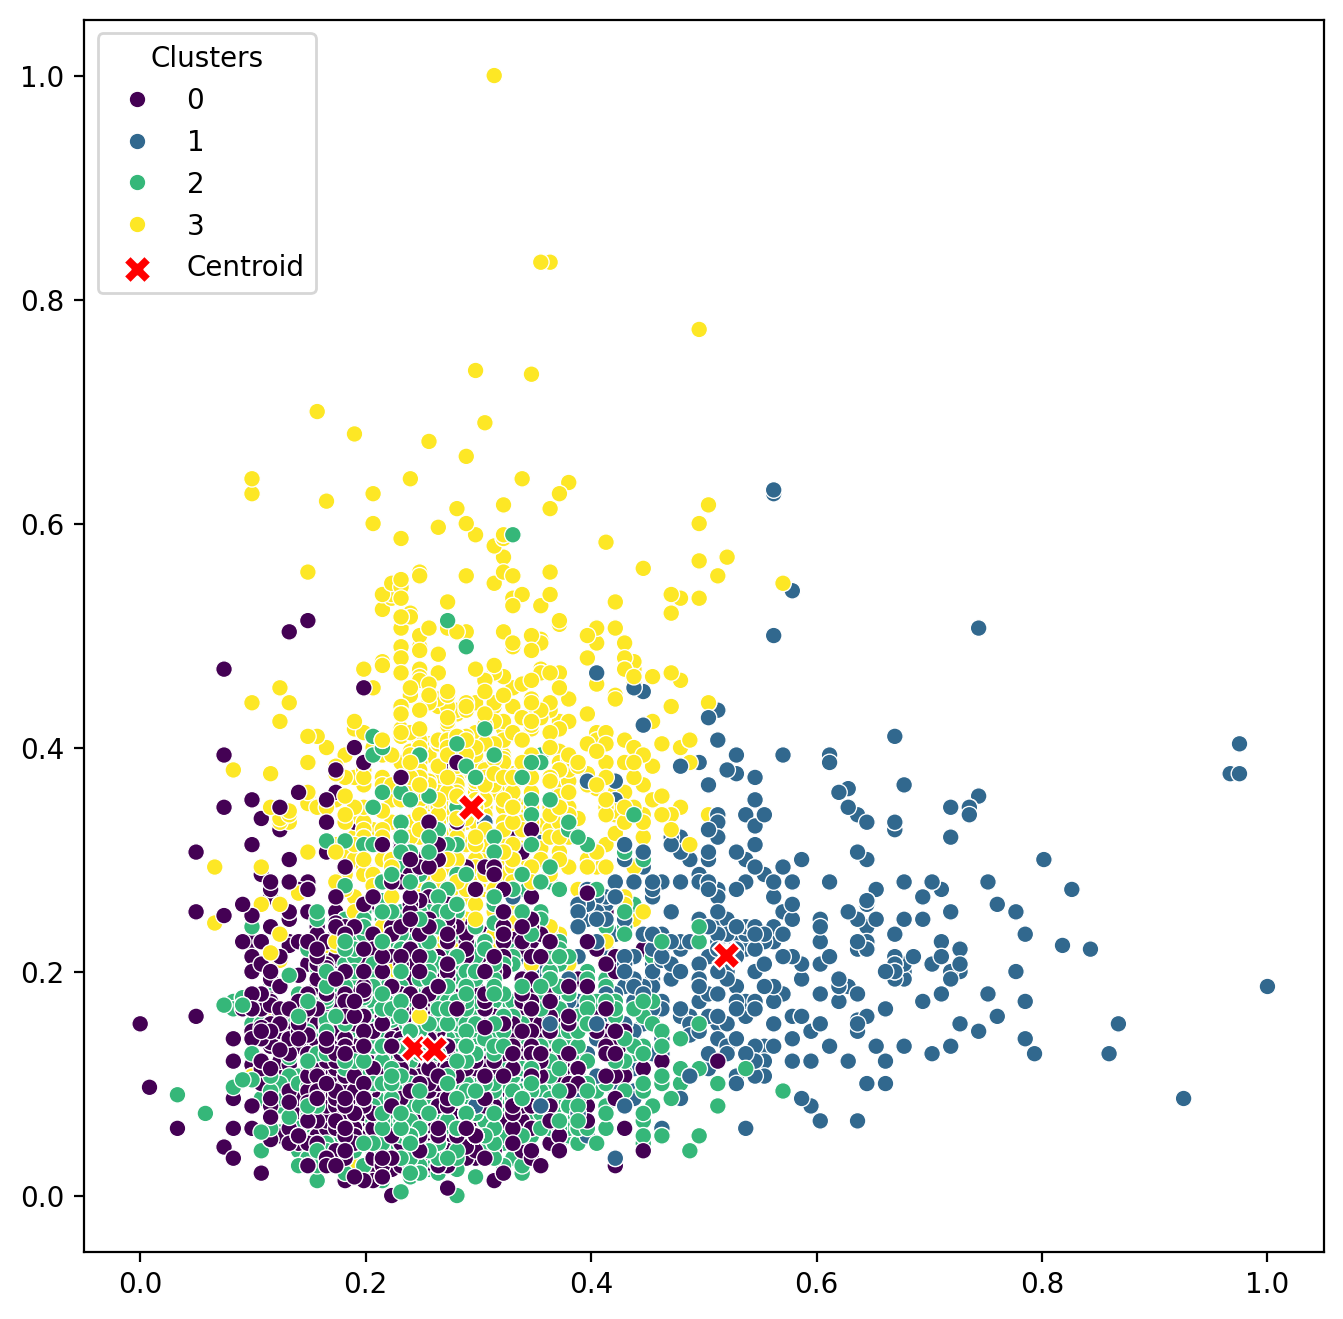

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10000)
y_predict = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 8), dpi=200)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_predict, palette='viridis')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='X', s=100, color='red', label='Centroid')

plt.legend(title='Clusters', loc='upper left')
plt.show()

#### Let's check elbow method and silhouette score for this cluster

In [13]:
silhouette_avg = silhouette_score(X_scaled, y_predict)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.24537412138627498


### *It is clear that the dataset suggests 4 clusters when considering all features. However, rather than using all features for clustering, a more effective approach would be to identify the most relevant features and apply an appropriate number of clusters based on those selected features.*

### Let's see corelation matrix to find correlation between features

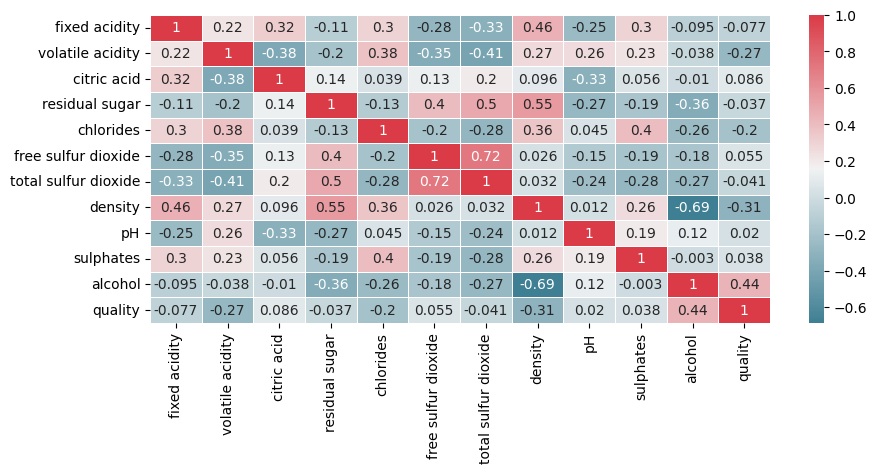

In [14]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(numeric_df.corr(), cmap=cmap, annot=True, linewidths=0.5)
plt.show()

###  *As it is visible from the matrix above that*
### *(residual sugar, density) = 0.55 and (alcohol, density) = -0.69 have strong corelations*

<Figure size 1000x1000 with 0 Axes>

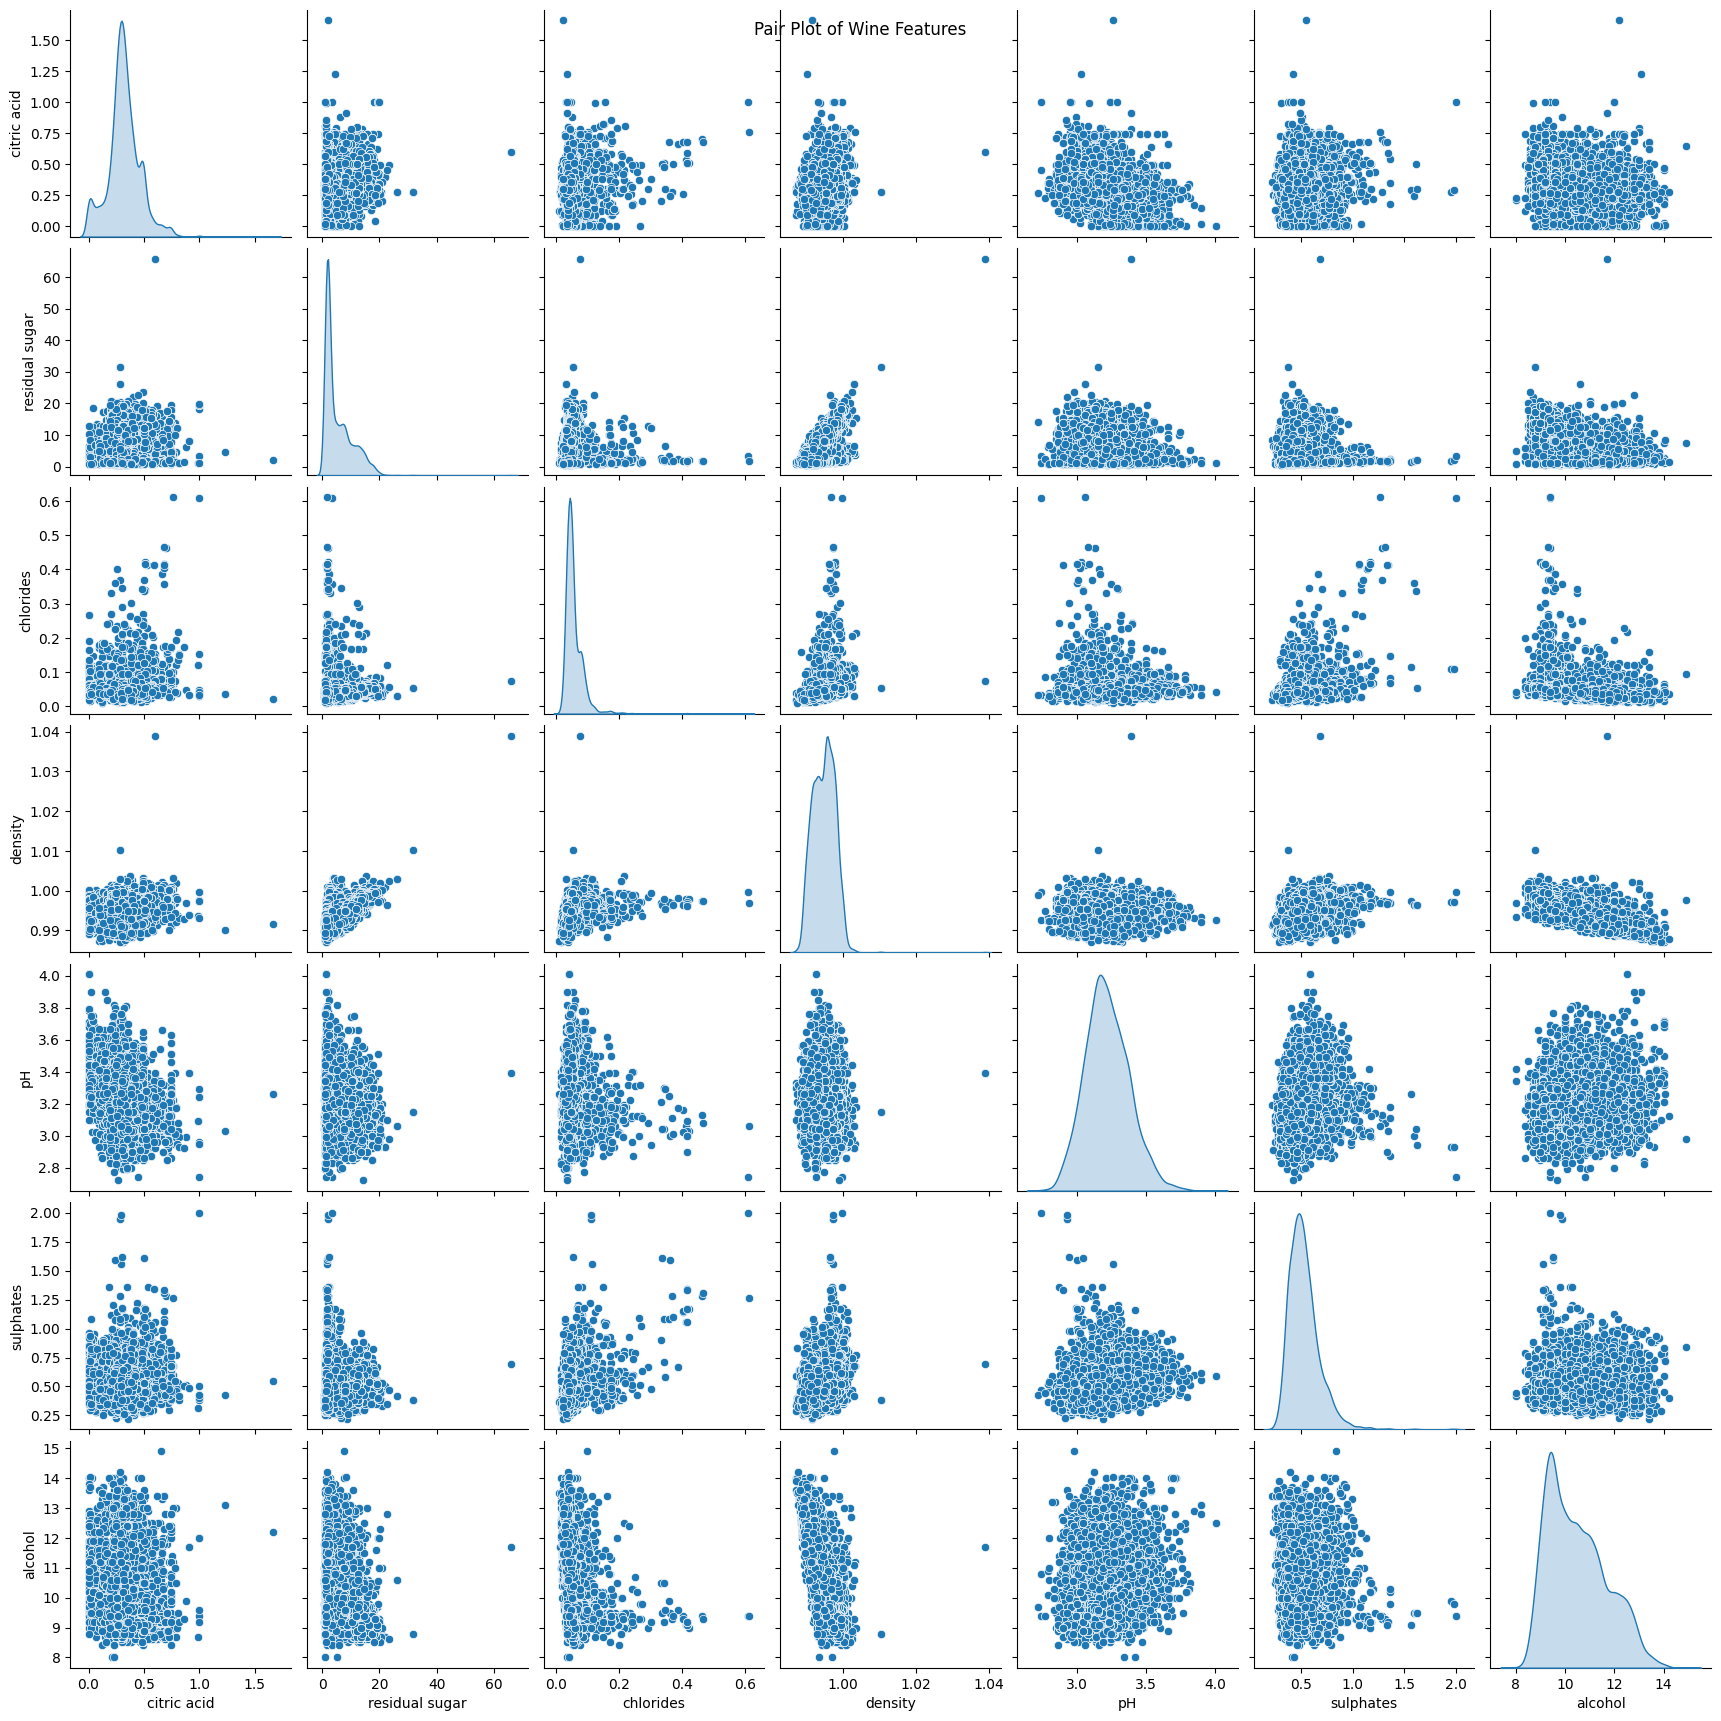

In [15]:
# Create a pair plot to see scatterplot between varuios features
plt.figure(figsize=(10, 10), dpi=100)
sns.pairplot(df[['citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']], diag_kind="kde", markers='o')
plt.suptitle("Pair Plot of Wine Features")
plt.show()

## *From the above pairplot, pH and alcohol seems good candidates for clustering as the data is spherical*

/var/folders/sg/0mhq7n352514_w3l2tm5gt0m0000gn/T/ipykernel_35568/2688030402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['pH', 'alcohol']] = scaler.transform(X)


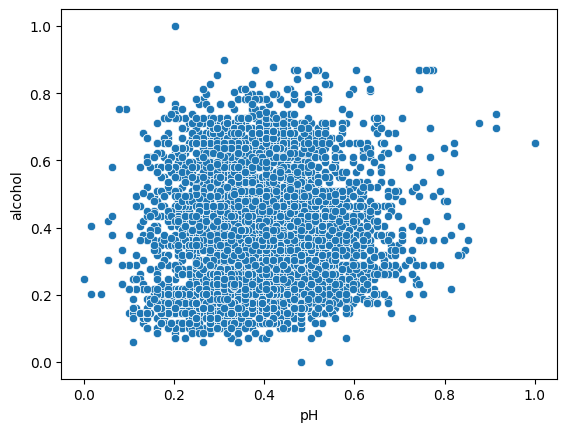

In [16]:
X = df[['pH', 'alcohol']]
scaler = MinMaxScaler()
scaler.fit(X)
X[['pH', 'alcohol']] = scaler.transform(X)
# X.head()

sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1])
# Add labels to the axes
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
# Show the plot
plt.show()

### Let us use k mean clustering with 3 clusters and see how the clusters look like

In [17]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=1000)
kmeans

KMeans(n_clusters=3, n_init=1000, random_state=0)

In [18]:
y_predict = kmeans.fit_predict(X)
y_predict

array([0, 2, 2, ..., 2, 1, 1], dtype=int32)

In [19]:
centroids = kmeans.cluster_centers_
centroids

array([[0.51756438, 0.32805491],
       [0.36586033, 0.56836636],
       [0.311906  , 0.22354857]])

/var/folders/sg/0mhq7n352514_w3l2tm5gt0m0000gn/T/ipykernel_35568/1334610623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.fit_predict(X)


<Axes: xlabel='pH', ylabel='alcohol'>

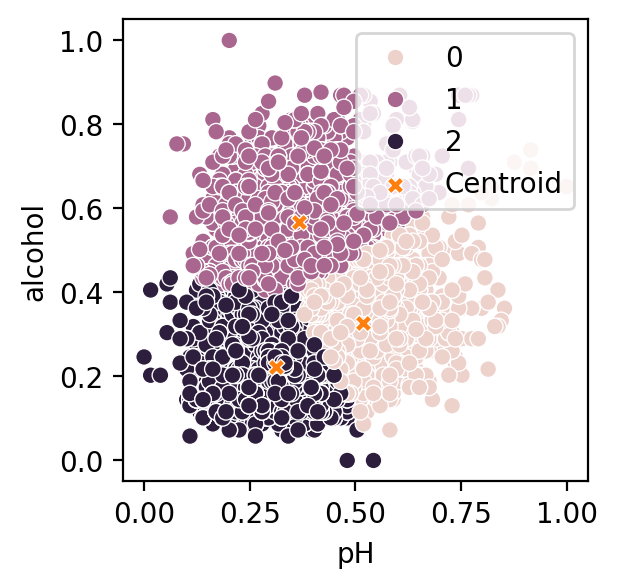

In [20]:
# Convert centroids to a DataFrame
centroids_df = pd.DataFrame(centroids, columns=["X", "Y"])
# Assuming you have already fit your KMeans model

X['cluster'] = kmeans.fit_predict(X)
# Add the centroids to the plot
plt.figure(figsize=(3, 3), dpi=200)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=X["cluster"])
sns.scatterplot(data=centroids_df, x="X", y="Y", marker='X', label='Centroid')

## Let's apply elbow Method for this 

In [21]:
sse = [] ## sum of squared errors
k_range = range(2,10)
score = []
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    score.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
score

[0.7005277954531772,
 0.8501561158883062,
 0.7121665664454562,
 0.5724070430062592,
 0.3492186352645772,
 0.3581873738180677,
 0.37646494198341857,
 0.3945789208816905]

[Text(0.5, 0, 'no of clusters'),
 Text(0, 0.5, 'SSE(Sum of squared error)'),
 Text(0.5, 1.0, 'sse vs number of clusters')]

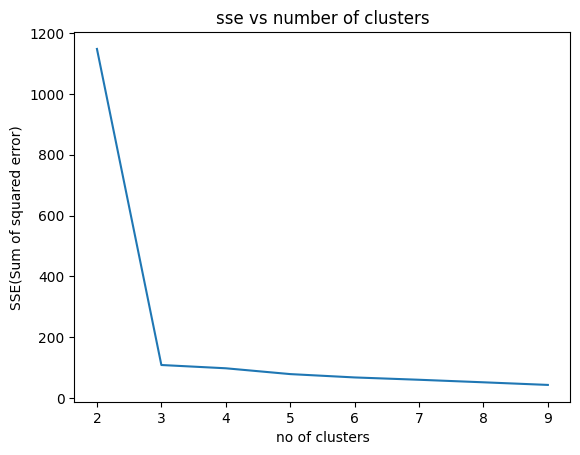

In [22]:
sseplot = sns.lineplot(x = k_range, y = sse)
sseplot.set(xlabel ="no of clusters", ylabel = "SSE(Sum of squared error)", title ="sse vs number of clusters")

### Elbow method here prove k = 3 is right but we should check with silhouette coefficient as well

In [23]:
silhouette_avg = silhouette_score(X, y_predict)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.8501561158883062


#### Let's visualize differant silhouette score for different number of cluster for PH and Alcohol of wine

In [24]:
def visualize_silhouette(X, n_clusters, range_n_clusters, cluster_labels):
    for n_clusters in range_n_clusters:
        # Create a subplot for the silhouette plot
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(7, 5)

        # The silhouette coefficient can range from -1 to 1, but in this example, all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.4, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for the next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for the average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the y-axis labels / ticks
        ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()
    

For n_clusters = 2 The average silhouette_score is : 0.6584032647777057
For n_clusters = 3 The average silhouette_score is : 0.8501561158883062
For n_clusters = 4 The average silhouette_score is : 0.7089781540268729
For n_clusters = 5 The average silhouette_score is : 0.5721816508779358
For n_clusters = 6 The average silhouette_score is : 0.3672566125828771
For n_clusters = 7 The average silhouette_score is : 0.3758393895957081
For n_clusters = 8 The average silhouette_score is : 0.38451306209185054
For n_clusters = 9 The average silhouette_score is : 0.39301865101637345


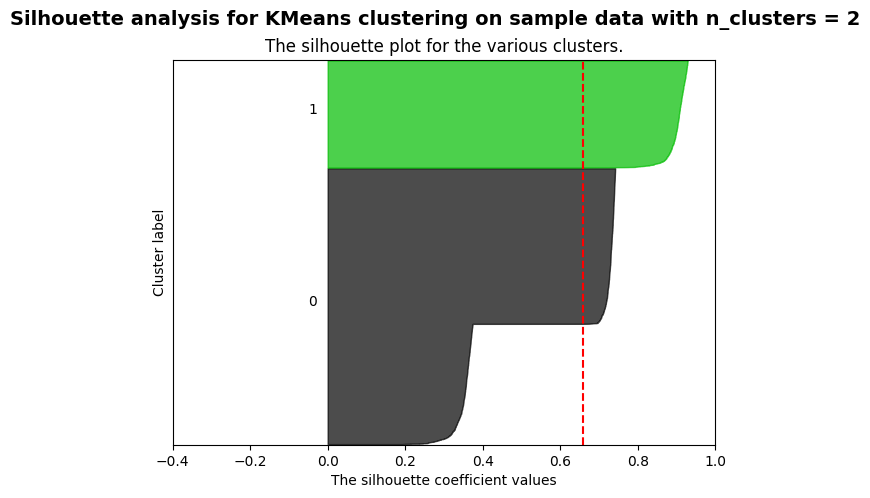

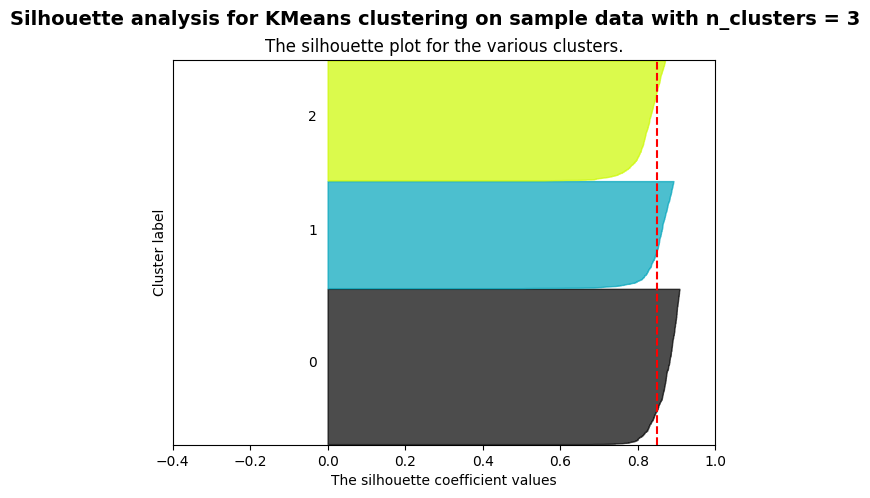

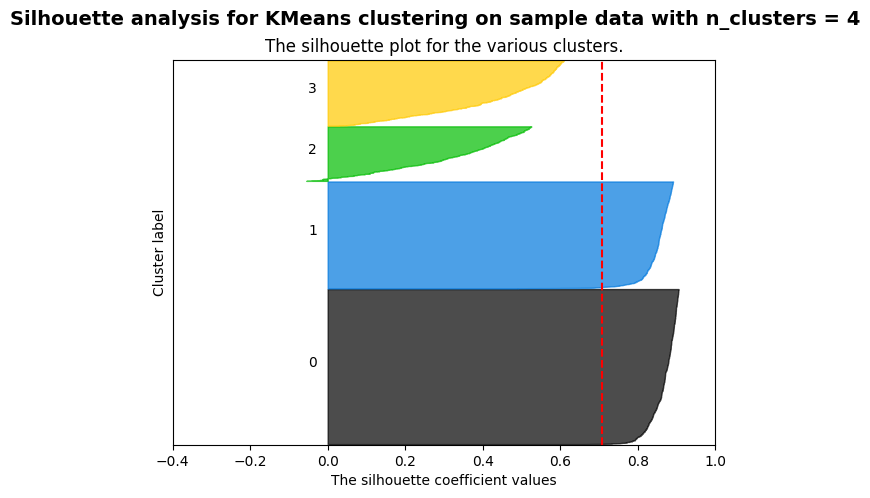

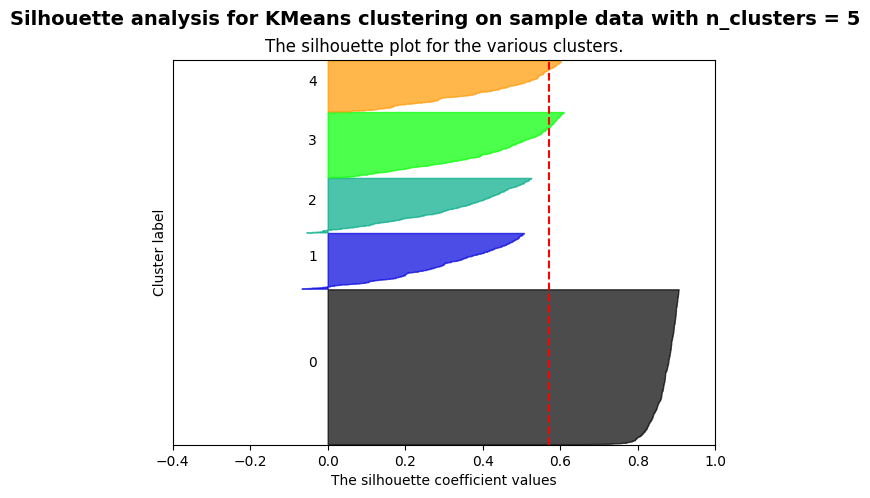

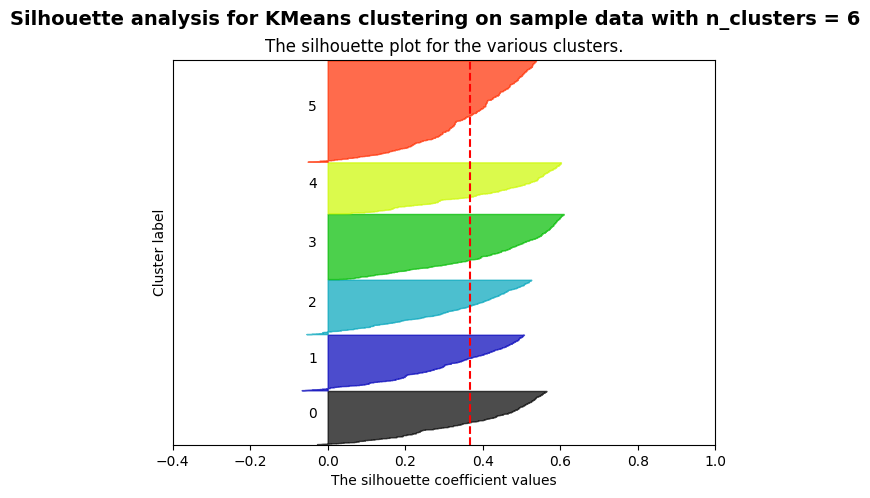

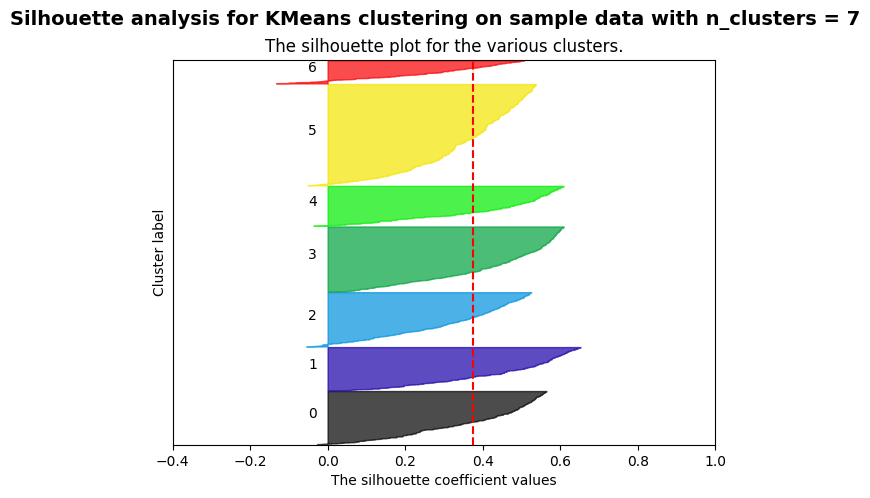

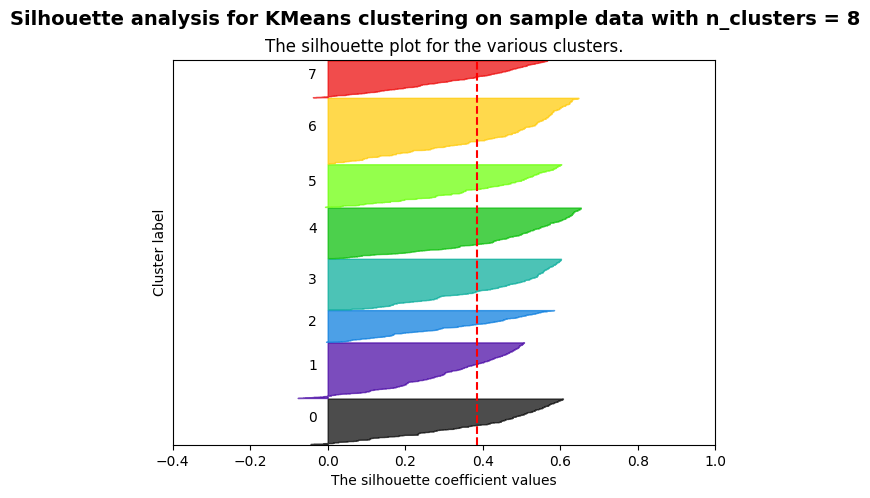

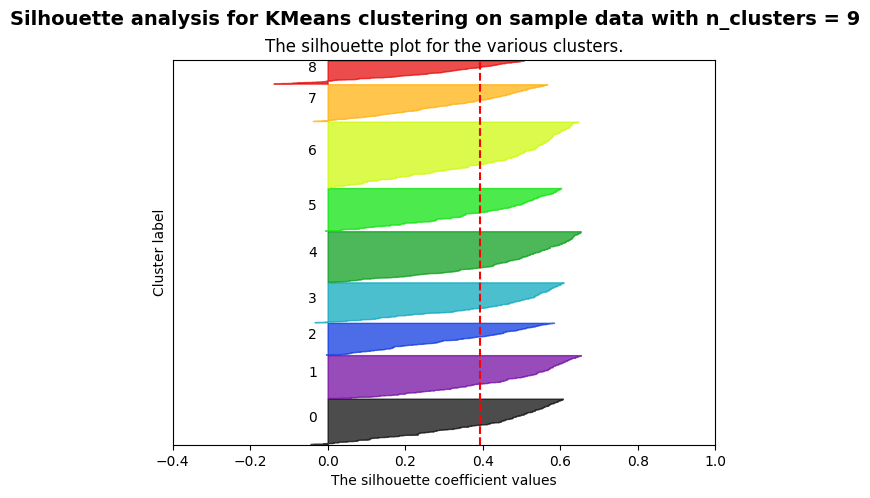

In [25]:
visualize_silhouette(X, k, k_range, kmeans.labels_)

#### *Conclusion :* elbow method suggested k = 3, For n_clusters = 3 The average silhouette_score is :  0.8501561158883062 which is highest.

### *Therefore, it is meaningful to use only the most important or highly correlated features of the dataset, as indicated by both the elbow method and silhouette score. The silhouette score improves significantly from 0.2453 (when considering all features) to 0.8501 when using the selected important features*

## Let's check the number of records in each cluster

/var/folders/sg/0mhq7n352514_w3l2tm5gt0m0000gn/T/ipykernel_35568/1918112021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=cluster_distribution, palette='Blues')


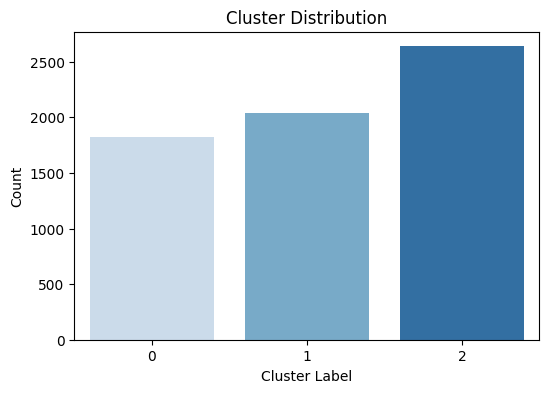

In [26]:
cluster_distribution = pd.DataFrame({'Predicted': y_predict})
plt.figure(figsize=(6, 4))
sns.countplot(x='Predicted', data=cluster_distribution, palette='Blues')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

### *KMeans is an unsupervised learning algorithm, which groups data points into clusters based on their similarity, It doesn't predict any target variable but for comparison of the clustering model accuracy with any other model accuracy we can train clustering model like :*

In [27]:
X = df[['pH', 'alcohol', 'quality']]

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

scaler_cluster = MinMaxScaler()
X_train_scaled_cluster = scaler_cluster.fit_transform(X_train[['pH', 'alcohol','quality']])
X_test_scaled_cluster = scaler_cluster.transform(X_test[['pH', 'alcohol','quality']])

# Train KMeans model on the training set
kmeans = KMeans(n_clusters=3, random_state=0, n_init=1000)
y_train_predict_cluster = kmeans.fit_predict(X_train_scaled_cluster)
y_test_predict_cluster = kmeans.predict(X_test_scaled_cluster)
y_test_true_labels_cluster = np.random.randint(0, 3, size=len(X_test))

accuracy_cluster = accuracy_score(y_test_true_labels_cluster, y_test_predict_cluster)
print(f"Clustering Model Accuracy: {accuracy_cluster}")

Clustering Model Accuracy: 0.3569230769230769


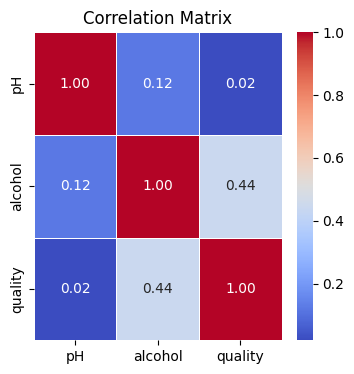

In [28]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## K-Mean Limitations
 >  Data that aren’t spherical or should not be spherical do not work well with k-means clustering
 
 >  It requires predefined number of clusters (K) which is challenging sometimes when we do not know much about the data.
 
 > Sensitive to outliers, as outliers can change of position of the cluster centroids so these outliers can heavily influecne the final clusters. 
 
 > Distance metric (e.g., Euclidean distance, Manhattan distance) can influcence the results so appropriate matric should be choosen according to the data and the problem. 
 
 > Numerical data only, may not work well on categorical or mixed data.
 

